In [ ]:
import pandas as pd

# Read the CSV files
metro_file = "/content/metro_centralities_output_Rank_Computed.csv"
road_file = "/content/road_centralities_ranks_computed.csv"
road_df = pd.read_csv(road_file)
metro_df = pd.read_csv(metro_file)
merged_df = pd.merge(metro_df[["Node ID", "Node Label", "Average_Rank"]],
                     road_df[["Node ID", "Node Label", "AverageRank"]],
                     on=["Node ID", "Node Label"],
                     how="outer")
merged_df = merged_df.rename(columns={"Average_Rank": "Average_Rank_Metro_Based", "AverageRank": "Average_Rank_Road_Based"})
# Save the merged DataFrame to a new CSV file
output_file = "mergedfile_of_both_average_ranks.csv"
merged_df.to_csv(output_file, index=False, columns=["Node ID", "Node Label", "Average_Rank_Metro_Based","Average_Rank_Road_Based"])

print("Merged table with average ranks from both CSV files has been generated.")


Merged table with average ranks from both CSV files has been generated.


In [ ]:
merged_df = merged_df.sort_values(by=["Average_Rank_Metro_Based"])

print("Print the top 10 nodes with the minimum ranks in Average Metro")
top_10_nodes = merged_df.head(10)
print(top_10_nodes['Node Label'])

merged_df = merged_df.sort_values(by=[ "Average_Rank_Road_Based"])

print("Print the top 10 nodes with the minimum ranks in  Average Road")
top_10_nodes = merged_df.head(10)
print(top_10_nodes['Node Label'])

Print the top 10 nodes with the minimum ranks in Average Metro
6                        Delhi Haat -INA
28                  National Rail Museum
38                       Safdarjung Tomb
30                     Nehru Planetarium
11              Hazrat Nizamuddin Shrine
8                   Gurudwara Rakab Ganj
27    National Museum of Natural History
24                           Amrit Udyan
31                         Majnu ka Tila
3                        Connaught Place
Name: Node Label, dtype: object
Print the top 10 nodes with the minimum ranks in  Average Road
18                    Jhandewalan Mandir
38                       Safdarjung Tomb
35               Rahim-Khane-Khanam Tomb
6                        Delhi Haat -INA
24                           Amrit Udyan
25        National Gallery of Modern Art
27    National Museum of Natural History
17                         Jantar Mantar
22                            Lodhi Tomb
12                        Humayun's Tomb
Name: Node Label, dtyp

6              Delhi Haat -INA
28        National Rail Museum
38             Safdarjung Tomb
30           Nehru Planetarium
11    Hazrat Nizamuddin Shrine
Name: Node Label, dtype: object


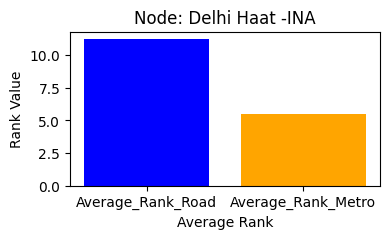

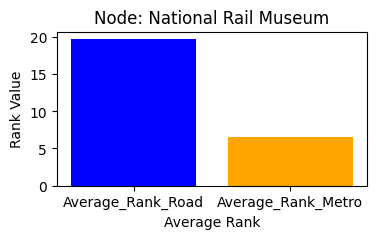

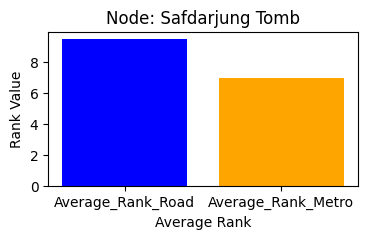

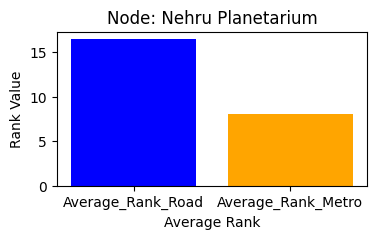

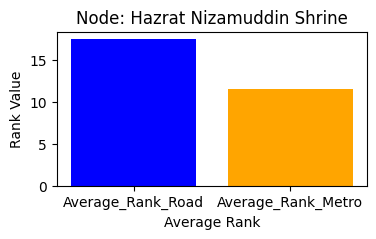

In [ ]:

import matplotlib.pyplot as plt
merged_df = merged_df.sort_values(by=["Average_Rank_Metro_Based"])

# Print the top 5 nodes with the Top ranks(minimum ranks) in both columns
top_05_nodes_metro = merged_df.head(5)
print(top_05_nodes_metro['Node Label'])

# Plot bar graphs for each of the top 10 nodes
for index, row in top_05_nodes_metro.iterrows():
    node_label = row["Node Label"]
    road_rank = row["Average_Rank_Road_Based"]
    metro_rank = row["Average_Rank_Metro_Based"]

    # Create a bar graph for the node
    plt.figure(figsize=(4, 2))
    plt.bar(["Average_Rank_Road", "Average_Rank_Metro"], [road_rank, metro_rank], color=["blue", "orange"])
    plt.xlabel("Average Rank")
    plt.ylabel("Rank Value")
    plt.title(f"Node: {node_label}")
    plt.show()


18         Jhandewalan Mandir
38            Safdarjung Tomb
35    Rahim-Khane-Khanam Tomb
6             Delhi Haat -INA
24                Amrit Udyan
Name: Node Label, dtype: object


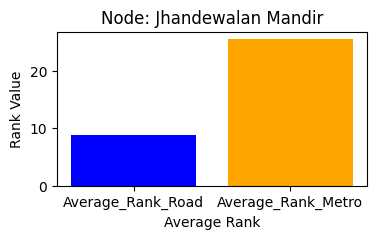

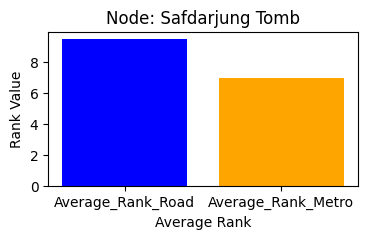

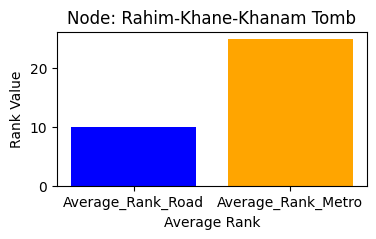

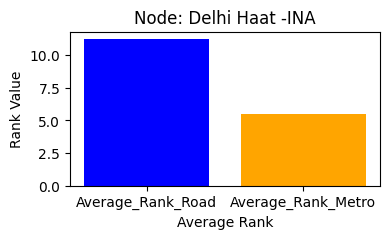

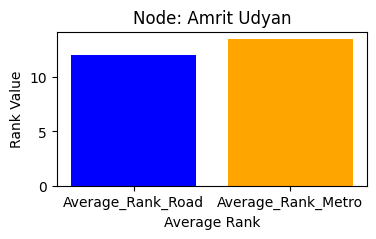

In [ ]:
merged_df = merged_df.sort_values(by=["Average_Rank_Road_Based"])

# Print the top 5 nodes with the minimum ranks in both columns based on road
top_05_nodes_road = merged_df.head(5)
print(top_05_nodes_road['Node Label'])

# Plot bar graphs for each of the top 10 nodes
for index, row in top_05_nodes_road.iterrows():
    node_label = row["Node Label"]
    road_rank = row["Average_Rank_Road_Based"]
    metro_rank = row["Average_Rank_Metro_Based"]

    # Create a bar graph for the node
    plt.figure(figsize=(4, 2))
    plt.bar(["Average_Rank_Road", "Average_Rank_Metro"], [road_rank, metro_rank], color=["blue", "orange"])
    plt.xlabel("Average Rank")
    plt.ylabel("Rank Value")
    plt.title(f"Node: {node_label}")
    plt.show()


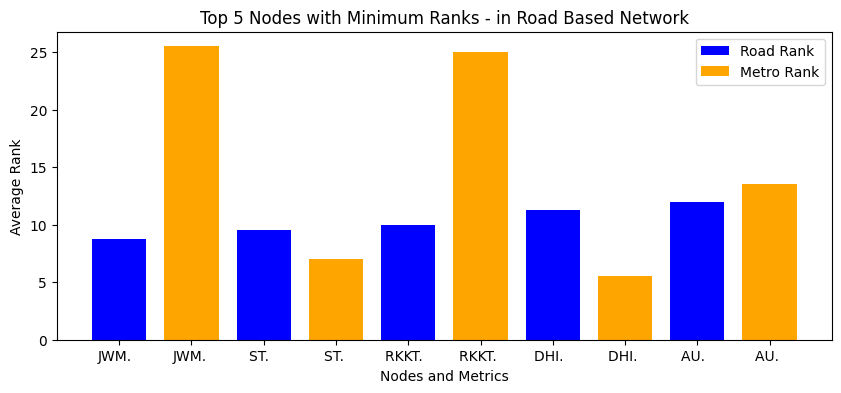

Full forms of nodes:
---------------------
JWM: Jhandewalan Mandir
ST: Safdarjung Tomb
RKKT: Rahim-Khane-Khanam Tomb
DHI: Delhi Haat -INA
AU: Amrit Udyan


In [ ]:
import matplotlib.pyplot as plt

merged_df = merged_df.sort_values(by=["Average_Rank_Road_Based"])

# Print the top 5 nodes with the minimum ranks in both columns based on road
top_05_nodes_road = merged_df.head(5)

# Abbreviated names for the top 5 nodes
abbreviated_names = ['JWM', 'ST', 'RKKT', 'DHI', 'AU']

# Create a dictionary for full forms of nodes
full_form_dict = {
    'JWM': 'Jhandewalan Mandir',
    'ST': 'Safdarjung Tomb',
    'RKKT': 'Rahim-Khane-Khanam Tomb',
    'DHI': 'Delhi Haat -INA',
    'AU': 'Amrit Udyan'
}

# Create a bar graph for the top 5 nodes with different colors
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

# Use two colors to differentiate between road rank and metro rank
colors = ['blue', 'orange']

for i, (index, row) in enumerate(top_05_nodes_road.iterrows()): # The enumerate() function is used to get both the index i and the row data row for each iteration. and iterrows() is used to iterate over the row data of individual nodes in dataframe
    node_label = abbreviated_names[i]
    road_rank = row["Average_Rank_Road_Based"]
    metro_rank = row["Average_Rank_Metro_Based"]

    # Add bars for each node with different colors for road and metro rank
    plt.bar(f"{node_label}.  ", road_rank, color=colors[0], label='Road Rank',width=0.75)
    plt.bar(f"{node_label}. ", metro_rank, color=colors[1], label='Metro Rank',width=0.75)


plt.xlabel("Nodes and Metrics")
plt.ylabel("Average Rank")
plt.title("Top 5 Nodes with Minimum Ranks - in Road Based Network")
plt.legend(['Road Rank', 'Metro Rank'], loc='upper right')
plt.show()

# Print the table for full forms of nodes
print("Full forms of nodes:")
print("---------------------")
for node in abbreviated_names:
    print(f"{node}: {full_form_dict[node]}")

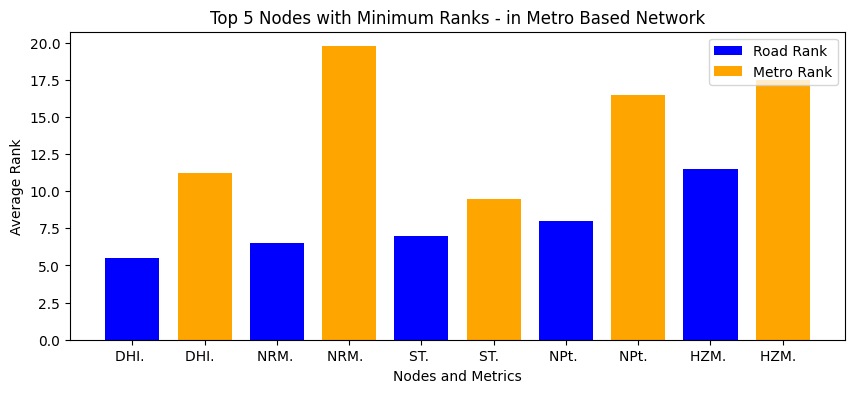

Full forms of nodes:
---------------------
DHI: Delhi Haat -INA
NRM: National Rail Museum
ST: Safdarjung Tomb
NPt: Nehru Planetarium
HZM: Hazrat Nizamuddin Shrine


In [ ]:
abbreviated_names = ['DHI', 'NRM', 'ST', 'NPt', 'HZM']

# Create a dictionary for full forms of nodes
full_form_dict = {
    'DHI': 'Delhi Haat -INA',
    'NRM': 'National Rail Museum',
    'ST': 'Safdarjung Tomb',
    'NPt': 'Nehru Planetarium',
    'HZM': 'Hazrat Nizamuddin Shrine'

}

# Create a bar graph for the top 5 nodes with different colors
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

# Use two colors to differentiate between road rank and metro rank
colors = ['orange', 'blue']

for i, (index, row) in enumerate(top_05_nodes_metro.iterrows()): # The enumerate() function is used to get both the index i and the row data row for each iteration. and iterrows() is used to iterate over the row data of individual nodes in dataframe
    node_label = abbreviated_names[i]
    road_rank = row["Average_Rank_Road_Based"]
    metro_rank = row["Average_Rank_Metro_Based"]

    # Add bars for each node with different colors for road and metro rank

    plt.bar(f"{node_label}. ", metro_rank, color=colors[1], label='Metro Rank',width=0.75)
    plt.bar(f"{node_label}.  ", road_rank, color=colors[0], label='Road Rank',width=0.75)

plt.xlabel("Nodes and Metrics")
plt.ylabel("Average Rank")
plt.title("Top 5 Nodes with Minimum Ranks - in Metro Based Network")
plt.legend(['Road Rank', 'Metro Rank'], loc='upper right')
plt.show()

# Print the table for full forms of nodes
print("Full forms of nodes:")
print("---------------------")
for node in abbreviated_names:
    print(f"{node}: {full_form_dict[node]}")

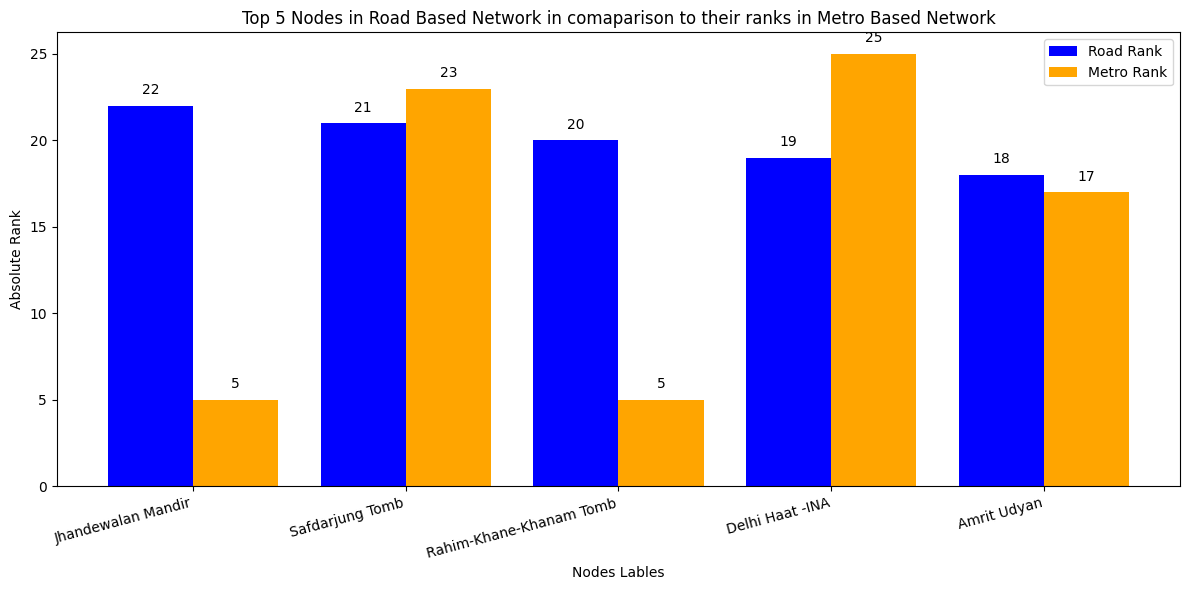

In [ ]:
import matplotlib.pyplot as plt
import math

merged_df = merged_df.sort_values(by=["Average_Rank_Road_Based"])

# Print the top 5 nodes with the minimum ranks in both columns based on road
top_05_nodes_road = merged_df.head(5)

# Abbreviated names for the top 5 nodes
abbreviated_names = ['JWM', 'ST', 'RKKT', 'DHI', 'AU']

# Create a dictionary for full forms of nodes
full_form_dict = {
    'JWM': 'Jhandewalan Mandir',
    'ST': 'Safdarjung Tomb',
    'RKKT': 'Rahim-Khane-Khanam Tomb',
    'DHI': 'Delhi Haat -INA',
    'AU': 'Amrit Udyan'
}

# Create a bar graph for the top 5 nodes with different colors
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Use two colors to differentiate between road rank and metro rank
colors = ['blue', 'orange']

bar_width = 0.4
bar_positions = range(len(top_05_nodes_road))

for i, (index, row) in enumerate(top_05_nodes_road.iterrows()):
    node_label = abbreviated_names[i]
    road_rank = row["Average_Rank_Road_Based"]
    metro_rank = row["Average_Rank_Metro_Based"]

    # Subtract ranks from 100 and take the floor
    road_rank_floor = math.ceil(30-road_rank)
    metro_rank_floor = math.ceil(30-metro_rank)


    plt.bar(bar_positions[i], road_rank_floor, color=colors[0], label='Road Rank', width=bar_width)
    plt.bar(bar_positions[i] + bar_width, metro_rank_floor, color=colors[1], label='Metro Rank', width=bar_width)

    # Add bars for each node with different colors for road and metro rank
    plt.text(bar_positions[i], road_rank_floor + 0.5, str(road_rank_floor), ha='center', va='bottom', color='black')
    plt.text(bar_positions[i] + bar_width, metro_rank_floor + 0.5, str(metro_rank_floor), ha='center', va='bottom', color='black')


plt.xlabel("Nodes Lables")
plt.ylabel("Absolute Rank")
plt.title("Top 5 Nodes in Road Based Network in comaparison to their ranks in Metro Based Network")
plt.xticks([p + bar_width / 2 for p in bar_positions], [full_form_dict[node] for node in abbreviated_names], rotation=15, ha="right")
plt.legend(['Road Rank', 'Metro Rank'], loc='upper right')
plt.tight_layout()
plt.show()



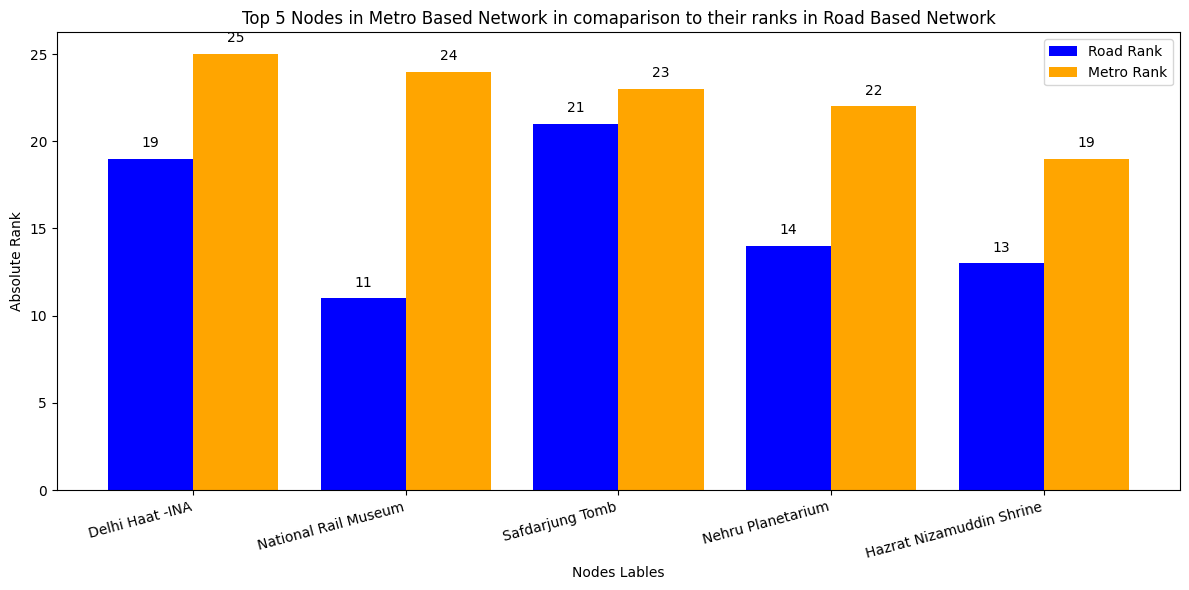

In [ ]:
merged_df = merged_df.sort_values(by=["Average_Rank_Metro_Based"])

# Print the top 5 nodes with the minimum ranks in both columns based on road
top_05_nodes_metro = merged_df.head(5)

abbreviated_names = ['DHI', 'NRM', 'ST', 'NPt', 'HZM']

# Create a dictionary for full forms of nodes
full_form_dict = {
    'DHI': 'Delhi Haat -INA',
    'NRM': 'National Rail Museum',
    'ST': 'Safdarjung Tomb',
    'NPt': 'Nehru Planetarium',
    'HZM': 'Hazrat Nizamuddin Shrine'

}


# Create a bar graph for the top 5 nodes with different colors
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Use two colors to differentiate between road rank and metro rank
colors = ['blue', 'orange']

bar_width = 0.4
bar_positions = range(len(top_05_nodes_road))

for i, (index, row) in enumerate(top_05_nodes_metro.iterrows()):
    node_label = abbreviated_names[i]
    road_rank = row["Average_Rank_Road_Based"]
    metro_rank = row["Average_Rank_Metro_Based"]

    # Subtract ranks from 100 and take the floor
    road_rank_floor = math.ceil(30-road_rank)
    metro_rank_floor = math.ceil(30-metro_rank)

    # Add bars for each node with different colors for road and metro rank
    plt.bar(bar_positions[i], road_rank_floor, color=colors[0], label='Road Rank', width=bar_width)
    plt.bar(bar_positions[i] + bar_width, metro_rank_floor, color=colors[1], label='Metro Rank', width=bar_width)
    plt.text(bar_positions[i], road_rank_floor + 0.5, str(road_rank_floor), ha='center', va='bottom', color='black')
    plt.text(bar_positions[i] + bar_width, metro_rank_floor + 0.5, str(metro_rank_floor), ha='center', va='bottom', color='black')


plt.xlabel("Nodes Lables")
plt.ylabel("Absolute Rank")
plt.title("Top 5 Nodes in Metro Based Network in comaparison to their ranks in Road Based Network")
plt.xticks([p + bar_width / 2 for p in bar_positions], [full_form_dict[node] for node in abbreviated_names], rotation=15, ha="right")
plt.legend(['Road Rank', 'Metro Rank'], loc='upper right')
plt.tight_layout()
plt.show()
